In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv')
print(data)


               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [13]:
print(data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

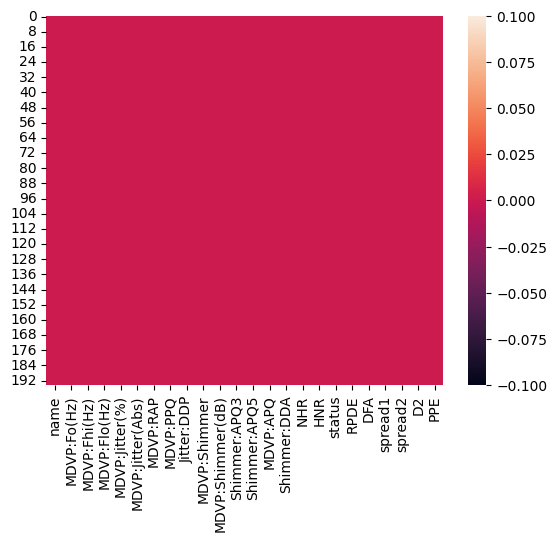

In [11]:
sns.heatmap(data.isnull())
plt.show()


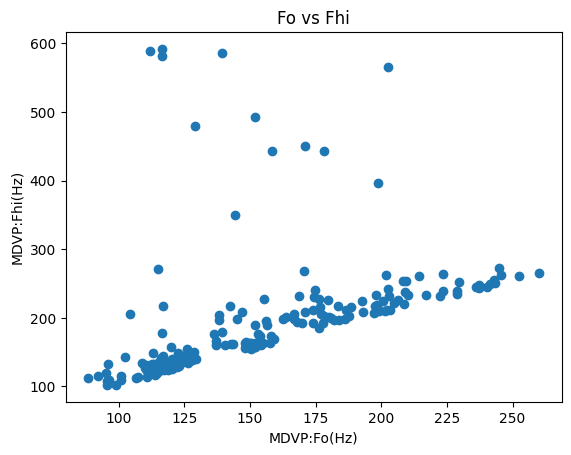

In [10]:
x=data['MDVP:Fo(Hz)']
y=data['MDVP:Fhi(Hz)']
plt.scatter(x,y)
plt.title('Fo vs Fhi')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.show()


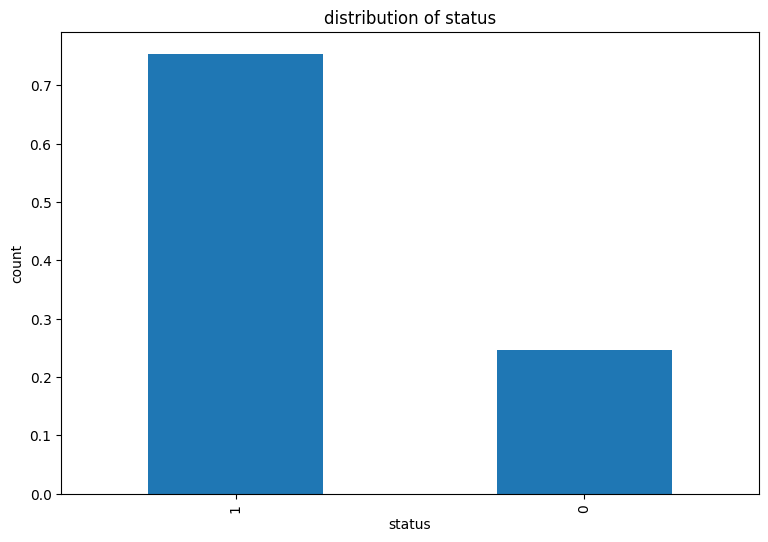

In [9]:
data['status'].value_counts(normalize=True).plot.bar(figsize=(9,6))
plt.xlabel('status')
plt.ylabel('count')
plt.title('distribution of status')
plt.show()


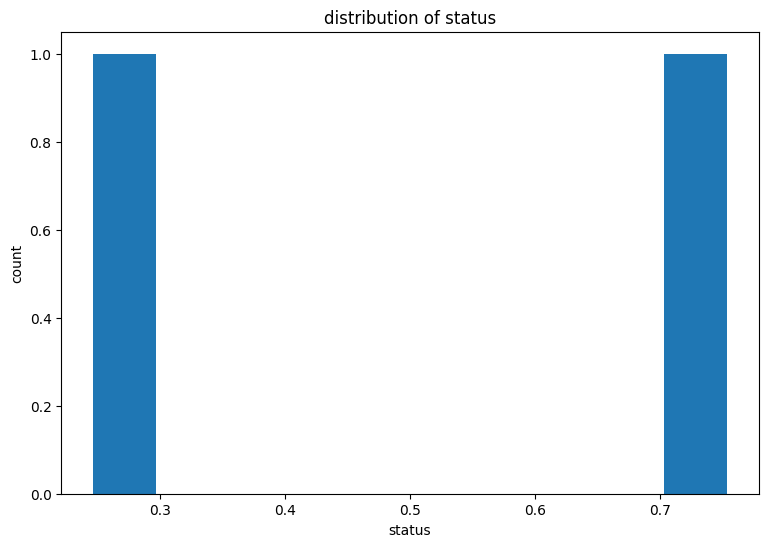

In [8]:
data['status'].value_counts(normalize=True).plot.hist(figsize=(9,6))
plt.xlabel('status')
plt.ylabel('count')
plt.title('distribution of status')
plt.show()


In [ ]:
X=data.drop(columns=['name','status'],axis=1)
Y=data['status']

print(X)
print(Y)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)
print(y_pred)
y_pred1=logreg.predict([[115.662,121.24,80.554,0.0045,0.00003,0.00593,0.0075,0.05439,0.06529,0.521,0.0346,0.04592,0.04591,0.09512,0.01253,22.588,0.459234,0.658293,-4.23586,0.356242,2.18567,0.24956]])
print(y_pred1)

[[ 8  3]
 [ 1 37]]


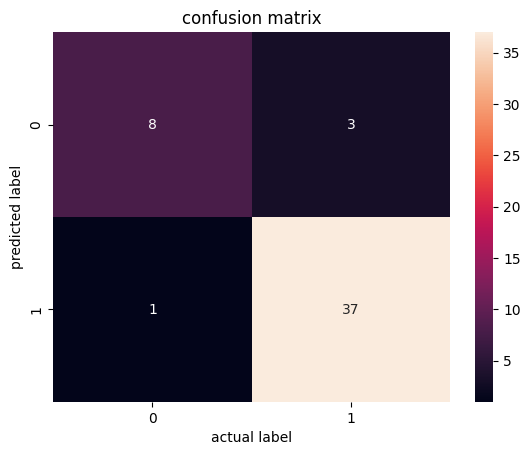

In [5]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
plt.title("confusion matrix")
plt.xlabel("actual label")
plt.ylabel("predicted label")
plt.show()


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
